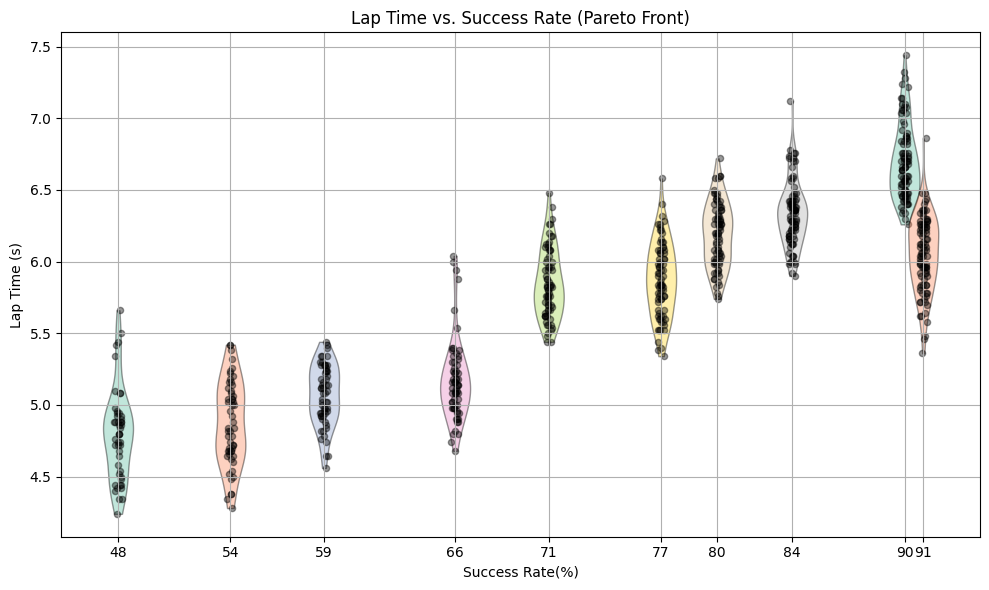

In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
from sympy import true

# load data
file_group_pairs = {
    f: pd.read_csv(f).query("`Lap Times` != -1").shape[0] / pd.read_csv(f).shape[0] * 100
    for f in os.listdir(".") if f.startswith("roll_outs") and f.endswith(".csv")
}

all_data = []
for file, group in file_group_pairs.items():
    df = pd.read_csv(file)
    df = df[df["Lap Times"] != -1]
    df["Group"] = group
    all_data.append(df)

df_all = pd.concat(all_data, ignore_index=True)
df_all["Group"] = pd.to_numeric(df_all["Group"])
unique_groups = sorted(df_all["Group"].unique())

plt.figure(figsize=(10, 6))
palette = plt.cm.Set2.colors
palette = sns.color_palette("Set2", n_colors=len(unique_groups))

for i, group in enumerate(unique_groups):
    y = df_all[df_all["Group"] == group]["Lap Times"].values
    x = np.full_like(y, group)

    # Violin: KDE density fit
    kde = gaussian_kde(y)
    y_vals = np.linspace(min(y), max(y), 200)
    densities = kde(y_vals)
    densities = densities / densities.max() * 0.8  # Violin Width

    # draw violin
    plt.fill_betweenx(y_vals, group - densities, group + densities,
                      facecolor=palette[i], alpha=0.4, edgecolor="k")

    # Strip scatter
    jitter = (np.random.rand(len(y)) - 0.5) * 0.4
    plt.scatter(x + jitter, y, color='black', alpha=0.4, s=20)

plt.xticks(unique_groups, [str(int(g)) for g in unique_groups])
plt.xlabel(r"Success Rate(%)")
plt.ylabel("Lap Time (s)")
plt.grid(True)
plt.title("Lap Time vs. Success Rate (Pareto Front)")
plt.tight_layout()
plt.show()
